In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sns.__version__)
print(matplotlib.__version__)

0.9.0
3.0.2


In [3]:
sns.set() #set default Seaborn theme, Scaling and color palette
tips = sns.load_dataset("tips") # use example dataset from seaborn
print(tips[5:15])

    total_bill   tip     sex smoker  day    time  size
5        25.29  4.71    Male     No  Sun  Dinner     4
6         8.77  2.00    Male     No  Sun  Dinner     2
7        26.88  3.12    Male     No  Sun  Dinner     4
8        15.04  1.96    Male     No  Sun  Dinner     2
9        14.78  3.23    Male     No  Sun  Dinner     2
10       10.27  1.71    Male     No  Sun  Dinner     2
11       35.26  5.00  Female     No  Sun  Dinner     4
12       15.42  1.57    Male     No  Sun  Dinner     2
13       18.43  3.00    Male     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2


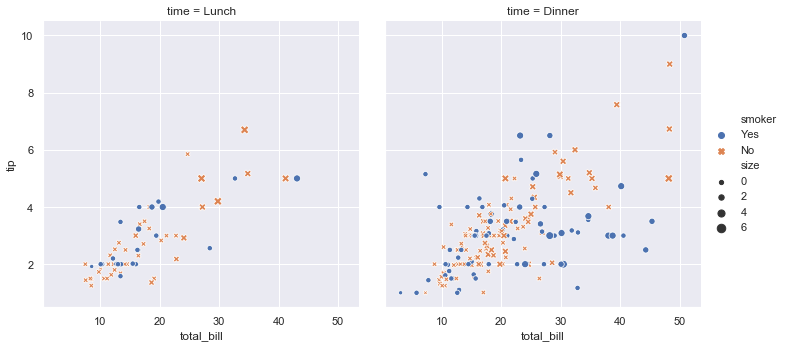

In [4]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)

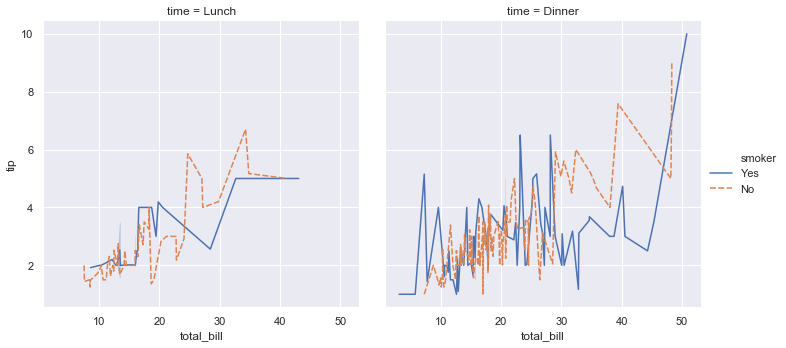

In [5]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", kind="line",
            legend="full", data=tips)

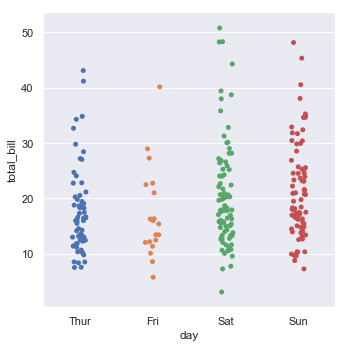

In [6]:
# Catagories
sns.catplot(x="day", y="total_bill", data=tips)

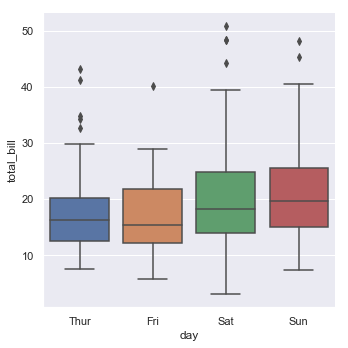

In [7]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

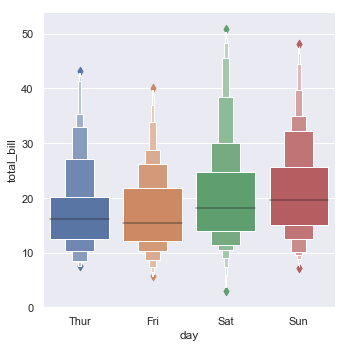

In [8]:
sns.catplot(x="day", y="total_bill", kind="boxen",
            data=tips)

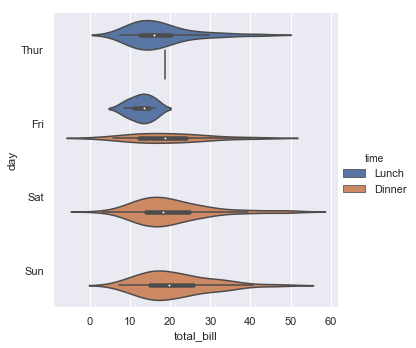

In [10]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)

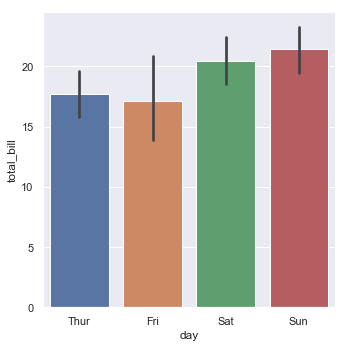

In [13]:
sns.catplot(x="day", y="total_bill", kind="bar", data=tips)

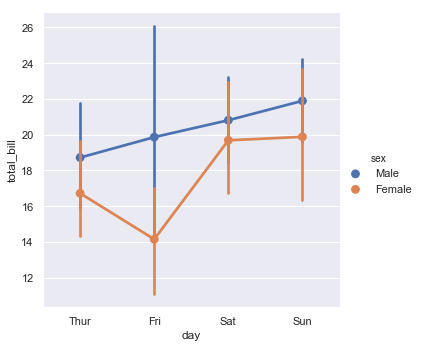

In [16]:
sns.catplot(x="day", y="total_bill",hue="sex", 
            kind="point", data=tips)

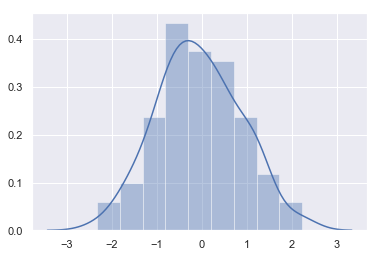

In [19]:
# Visualizing the distribution of a dataset
# Plotting univariate distributions
x = np.random.normal(size=100)
sns.distplot(x)

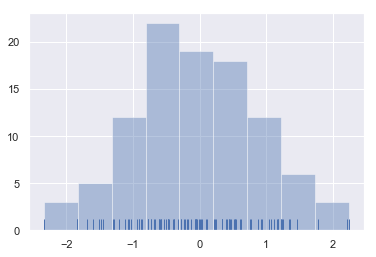

In [22]:
sns.distplot(x, kde=False, rug=True)

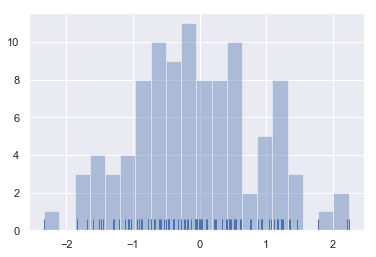

In [24]:
sns.distplot(x, bins=20, kde=False, rug=True)

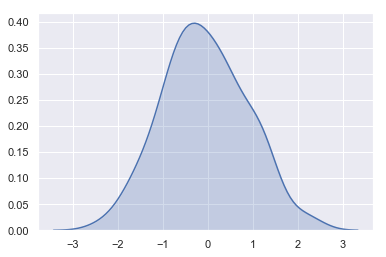

In [26]:
sns.kdeplot(x, shade=True)

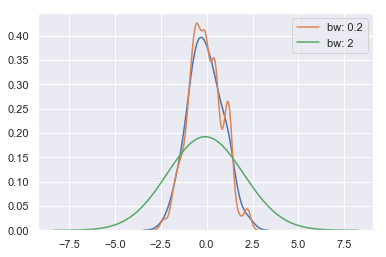

In [27]:
# The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, 
# much like the bin size in a histogram
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

In [28]:
# Plotting bivariate distributions
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

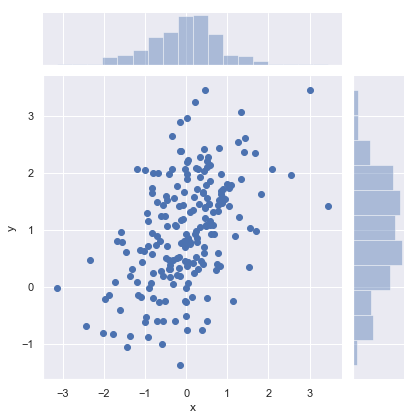

In [29]:
sns.jointplot(x="x", y="y", data=df)

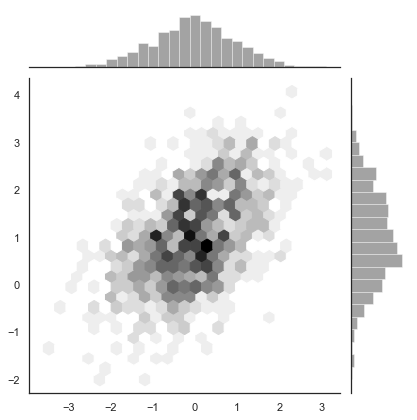

In [31]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

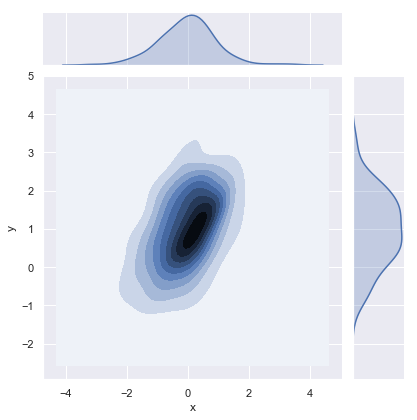

In [33]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

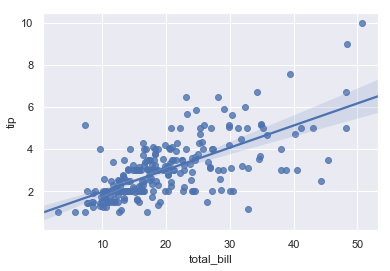

In [35]:
sns.regplot(x="total_bill", y="tip", data=tips)

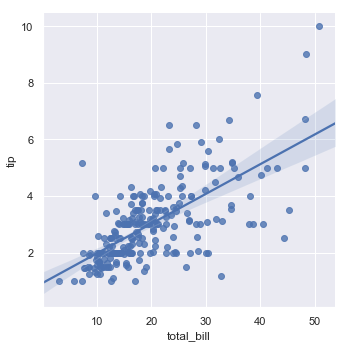

In [36]:
sns.lmplot(x="total_bill", y="tip", data=tips)

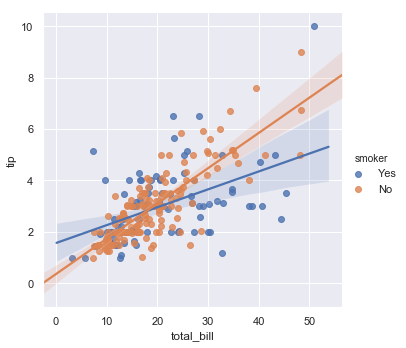

In [37]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

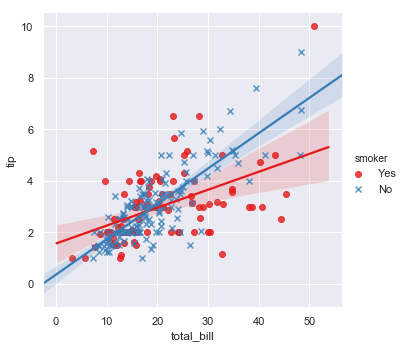

In [38]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

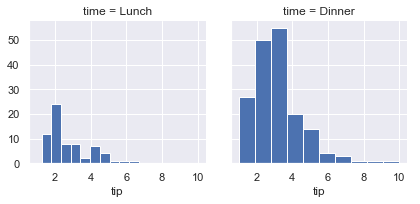

In [39]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

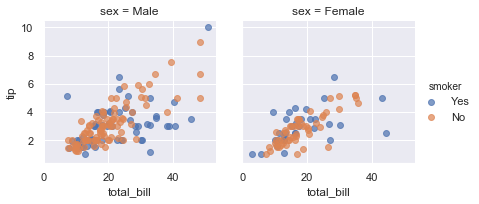

In [42]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

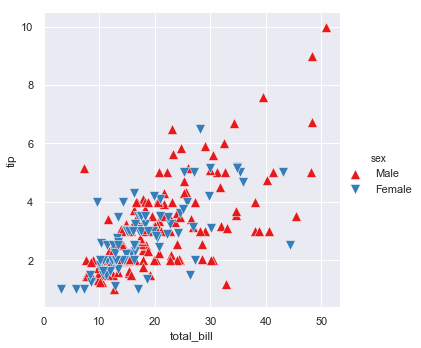

In [43]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

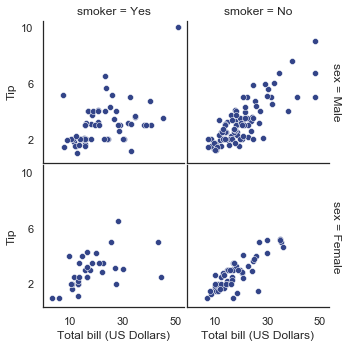

In [44]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

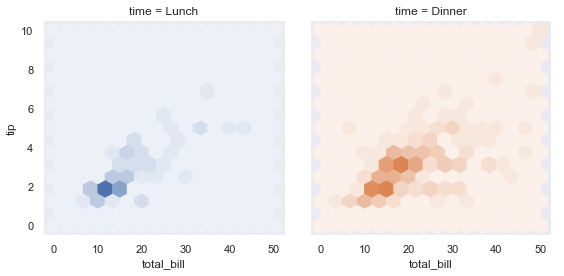

In [45]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])